# Project1 U.S. Employment Visas Analysis
### Team Member: Dengyi Liu, Xin Xiang, Yuchen Wang

## Section1: Introduction

As the most developed country in the world, the United States attracts workers from all over the world, and countless people hope to get a job there. The Immigration and Nationality Act (INA) of the U.S. permits foreign workers to come to the United States to work On either a temporary or permanent basis. But at the same time, when ensuring that U.S. employers obtain qualified talents, they also need to protect the employment rights and status of U.S. citizens, which requires relevant departments (such as customs, etc.) to identify each foreign employee, Give approval or denial.

The data set contains many variables, including the applicant's education, work experience, salary, and approval. 
**The objective of this study is we want to know the demographic of the applicants, and which characteristics of employees and employers are more likely to be granted visas, and we will perform the EDA and analysis of the data to answer this question.**

#### Data Description


* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

#### Import Libraries

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

#### Read the data

In [233]:
df=pd.read_csv(
    "https://raw.githubusercontent.com/prneidhardt/Ensemble-Learning/main/EasyVisa.csv"
)

## Section2: Data Summary

* The data was found at the github, the link is below:
https://github.com/prneidhardt/Ensemble-Learning/blob/main/EasyVisa.csv

#### View the first and last 5 rows of the dataset

In [234]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [235]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [236]:
df.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns 

#### Check the data types of the columns for the dataset

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* no_of_employees, yr_of_estab, and prevailing_wage are numeric features while rest are objects.
* There are no null values in the dataset.

#### Check the duplicated rows in the data.

In [238]:
df.duplicated().sum()

0

* There are no duplicate values in the data. 

#### Check the missing value

In [239]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing value in the dataa.

#### Check the statistical summary of the data

In [240]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


* The range of the number of employees in a company is huge. We can see that the minimum number of employees is equal to -26, which is impossible. We will fix this error.
* The year of establishment of companies ranges from 1800 to 2016. But the average, min, std and other info for this column are meaningless.
* The average prevailing wage is 74455.81. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.

#### Conclusion of the data.
* There are 25480 rows and 12 columns in the data, and there are no missing value and duplicated rows. But we need to replace the -26 in the column "no_of_emplojyees". 3 of the 12 columns are numeric columns, they are 'no_of_employees', 'yr_of_estab' and 'prevailing_wage'.
* We will use several different graphic to visualize the data in this research.

## Section3: Data Pre-processing

### Section3.A. Replace negative values in the column 'no_of_employee'.

* We will assume that the negative values were entried errors and we will take the absolute values for this column.

#### Check how many wrong number in this column

In [241]:
df.loc[df["no_of_employees"] < 0].shape

(33, 12)

* There are 33 negative values in the column.

#### Replace these values with absolute values.

In [242]:
df["no_of_employees"] = abs(df["no_of_employees"])

#### Check it again

In [243]:
df['no_of_employees'].describe()

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

* No negative values now, looks good.

### Section3.B. Create some meaningful new columns based on the original columns.

#### The yr_of_estab column is not useful here, we will create the yr_of_company (from the year it was established to 2022) column to show the age of the company. This new column is more meaningful, and we can delete the column "yr_of_estab".

In [244]:
df['yr_of_company']=2022-df['yr_of_estab']

In [245]:
df=df.drop(columns='yr_of_estab',axis=1)

#### Check the data again

In [246]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yr_of_company
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,15
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,20
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,14
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,125
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,17


In [247]:
df.describe()

,no_of_employees,prevailing_wage,yr_of_company
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,74455.814592,42.590071
std,22877.917453,52815.942327,42.366929
min,11.000000,2.136700,6.000000
25%,1022.000000,34015.480000,17.000000
50%,2109.000000,70308.210000,25.000000
75%,3504.000000,107735.512500,46.000000
max,602069.000000,319210.270000,222.000000


* We can notice that the oldest company is 222 years old, which is reasonable.

### Section3.C. Drop the columns that are meaningless or we don't need.

#### 'case_id' column is the column that shows the unique application, which is not useful in this research, so we will delete it.

In [248]:
df=df.drop(columns='case_id',axis=1)

#### Finally, check the data again.

In [249]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yr_of_company
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,15
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,20
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,14
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,125
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,17


* We are all set now, we can continue to work on the EDA and analysis.

## Section4: EDA

### Section4.A. Univariate Analysis

* Make the appropriate chart for each column.

In [250]:
#creat a function to make bar chart
def MBarplot(data,a,b):
    df2 = data.groupby([a]).count().sort_values(by=b,ascending=False)
    df2 = df2.reset_index()
    A = df2[a].head(12)
    B = df2[b].head(12)
 # Figure Size
    fig = plt.figure(figsize=(15,7))
 
 
 # Horizontal Bar Plot
    plt.bar(A,B)
    plt.ylabel("Apply Population")
    plt.title(a)
 # Show Plot
    plt.show()

* Above function is for matplotlib.

### Bar chart for categorical columns

**Column:continent**

**matplotlib**

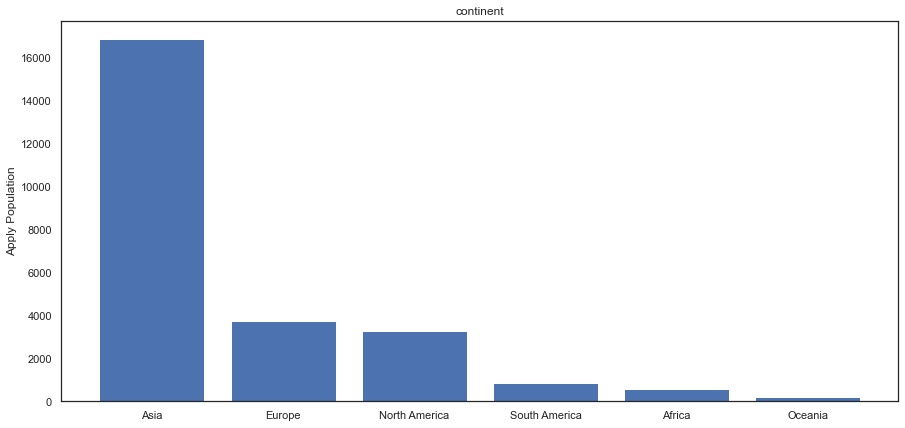

In [251]:
MBarplot(df,'continent','case_status')

**seaborn**

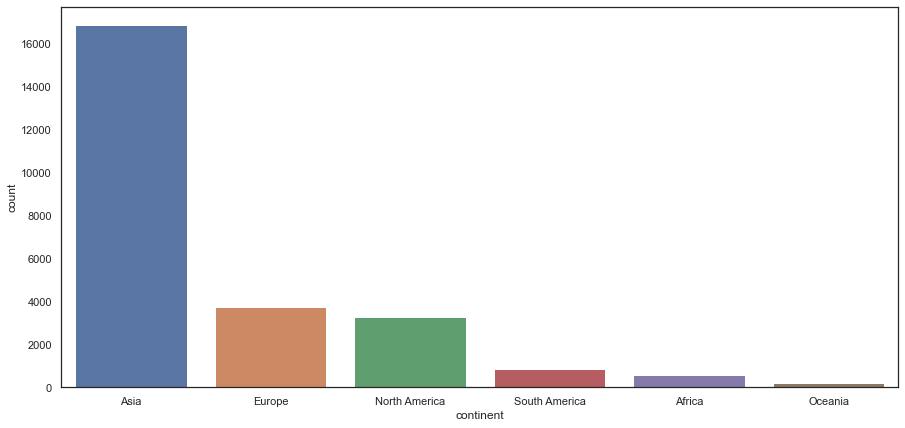

In [252]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['continent'],order=df['continent'].value_counts().index);

* From the barplot of continent, we can see that most of the applicant of visa are from Asia, follows by Europe.

**Column:continent**

**matplotlib**

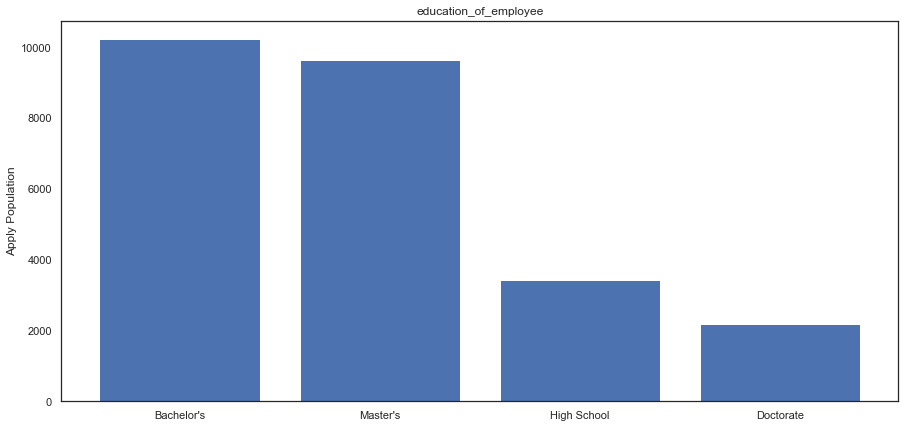

In [253]:
MBarplot(df,'education_of_employee','case_status')

**seaborn**

<AxesSubplot:xlabel='education_of_employee', ylabel='count'>

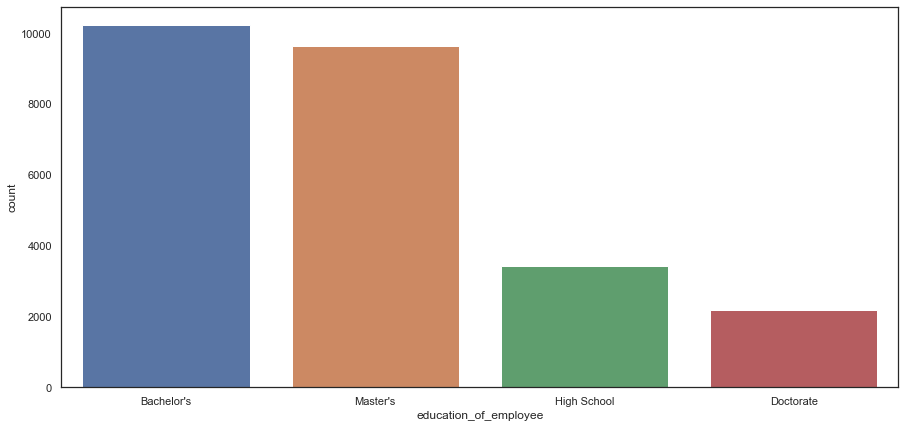

In [254]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['education_of_employee'],order=df['education_of_employee'].value_counts().index)

* From the barplot of the education of employee we can see that most of the applicant of visa have a degree of Bachelor follow by Master's degree.

**column:has_job_experience**

**matplotlib**

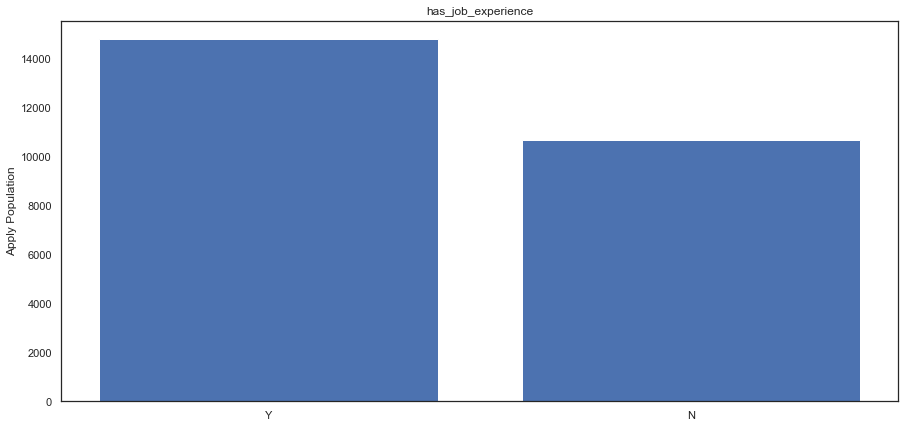

In [255]:
MBarplot(df,'has_job_experience','case_status')

<AxesSubplot:xlabel='has_job_experience', ylabel='count'>

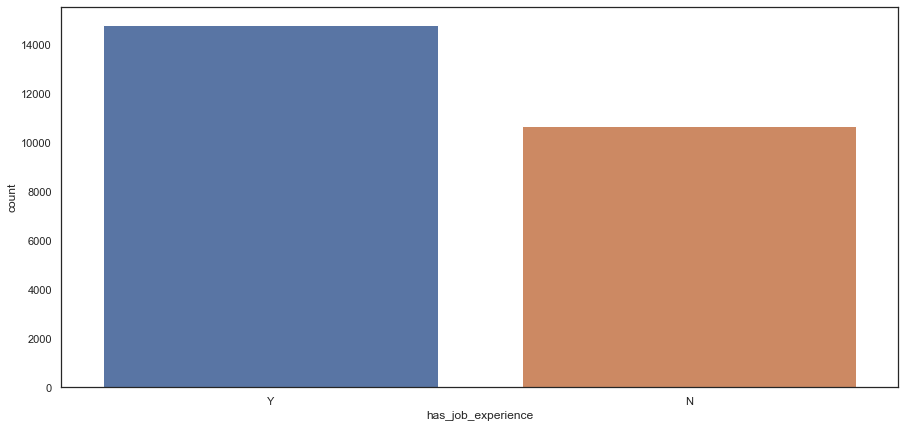

In [256]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['has_job_experience'],order=df['has_job_experience'].value_counts().index)

In [257]:
df['has_job_experience'].value_counts(normalize=True)

Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64

* From the barchat of 'has job experience' we can see that nearly 60% of applicant have previous job experience.

**column:requires_job_training**

**matplotlib**

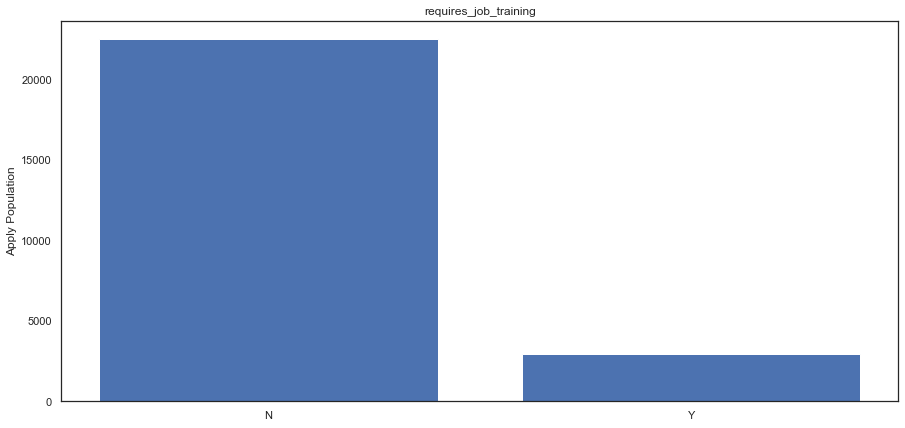

In [258]:
MBarplot(df,'requires_job_training','case_status')

<AxesSubplot:xlabel='requires_job_training', ylabel='count'>

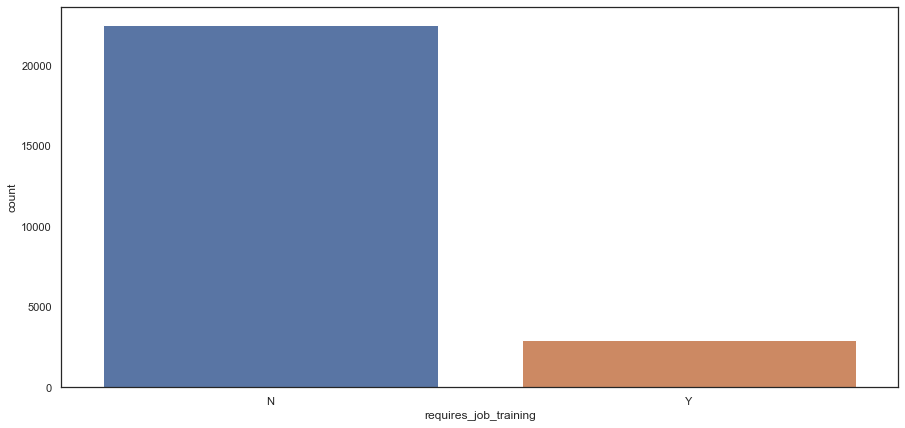

In [259]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['requires_job_training'],order=df['requires_job_training'].value_counts().index)

In [260]:
df['requires_job_training'].value_counts(normalize=True)

N    0.884027
Y    0.115973
Name: requires_job_training, dtype: float64

* From the barplot of 'requires job training' we can see that just a few applicants (about 12%) need a job training.

**column:region_of_employment**

**matplotlib**

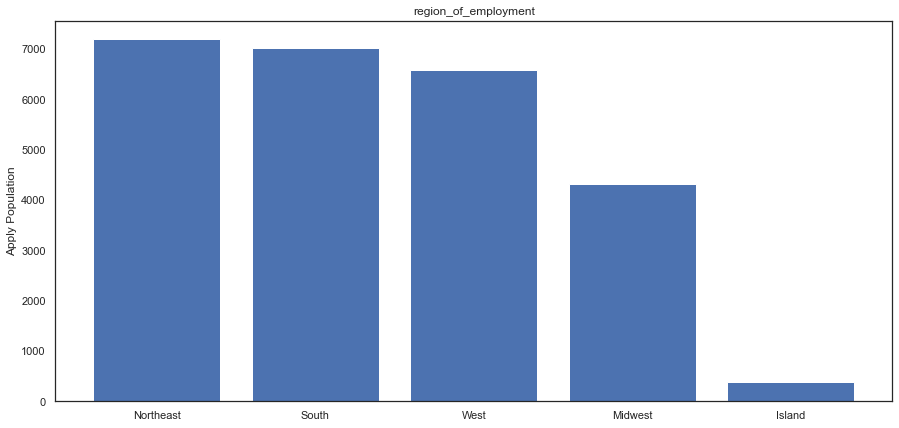

In [261]:
MBarplot(df,'region_of_employment','case_status')

<AxesSubplot:xlabel='region_of_employment', ylabel='count'>

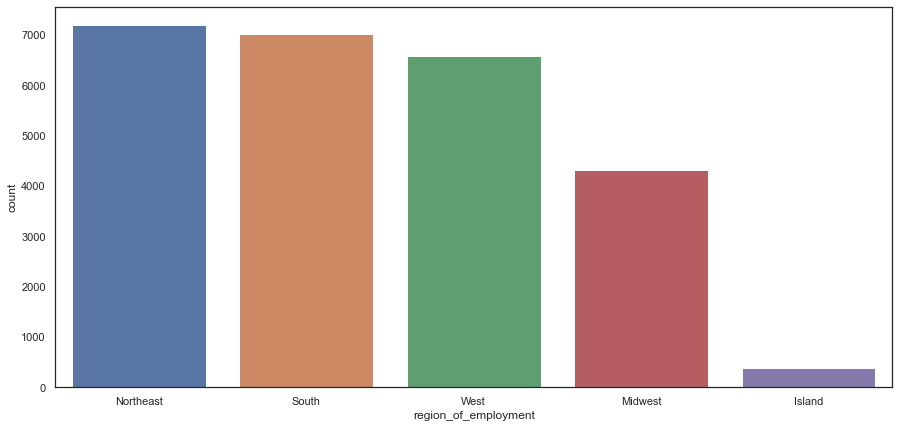

In [262]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['region_of_employment'],order=df['region_of_employment'].value_counts().index)

In [263]:
df['region_of_employment'].value_counts(normalize=True)

Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: region_of_employment, dtype: float64

* We can noticed that most of the employement are located in Northeast (around 28%) and follows by South (around 27%) and West (around 25%).

**column:unit_of_wage**

**matplotlib**

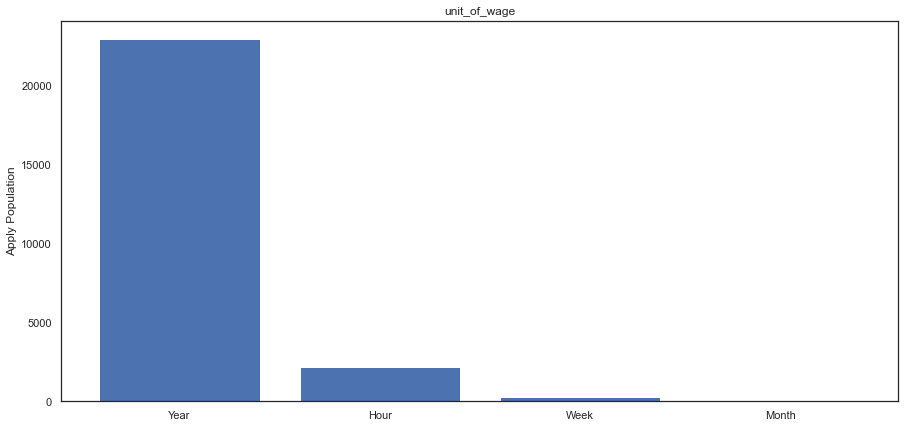

In [264]:
MBarplot(df,'unit_of_wage','case_status')

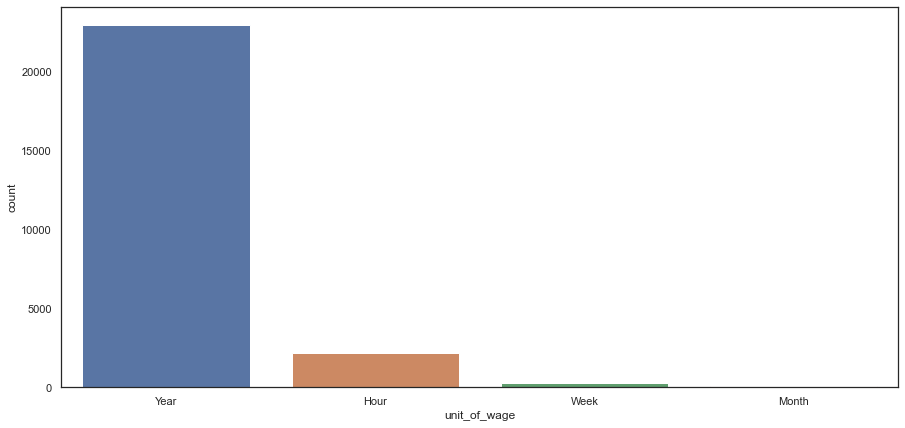

In [265]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['unit_of_wage'],order=df['unit_of_wage'].value_counts().index);

In [266]:
df['unit_of_wage'].value_counts(normalize=True)

Year     0.901177
Hour     0.084655
Week     0.010675
Month    0.003493
Name: unit_of_wage, dtype: float64

* Over 90% of the applicant get annual salary.

**column:full_time_position**

**matplotlib**

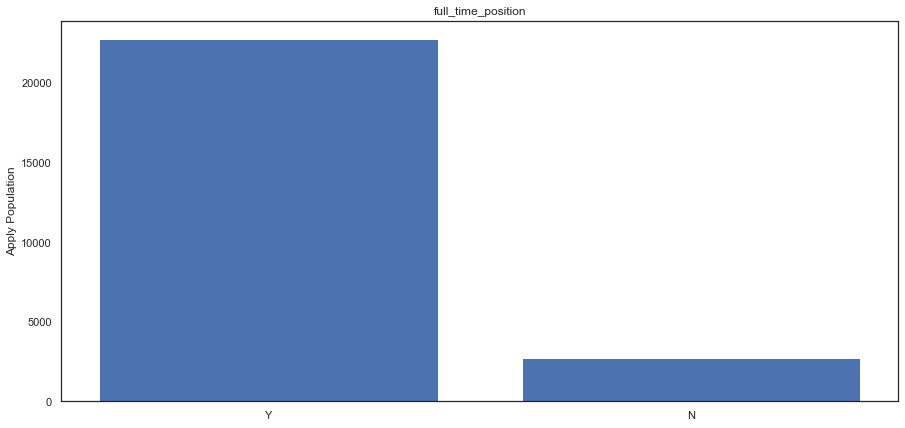

In [267]:
MBarplot(df,'full_time_position','case_status')

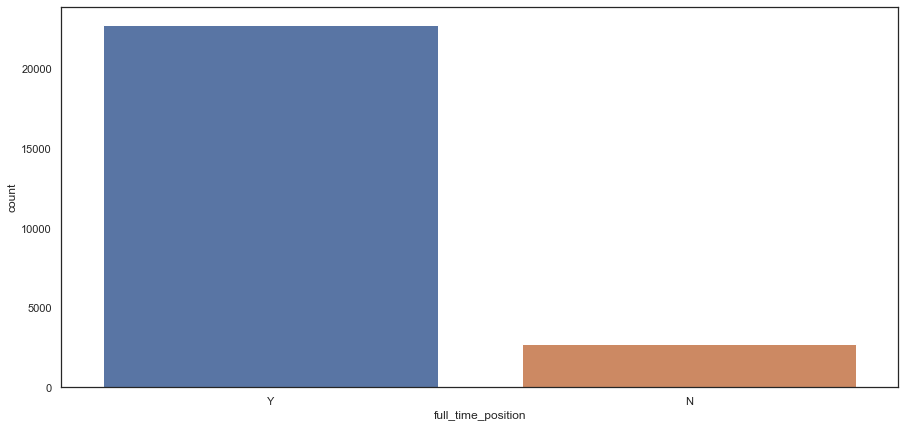

In [268]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['full_time_position'],order=df['full_time_position'].value_counts().index);

In [269]:
df['full_time_position'].value_counts(normalize=True)

Y    0.89376
N    0.10624
Name: full_time_position, dtype: float64

* Nearly 90 % of applicants have full time job.

**column:case_status**

**matplotlib**

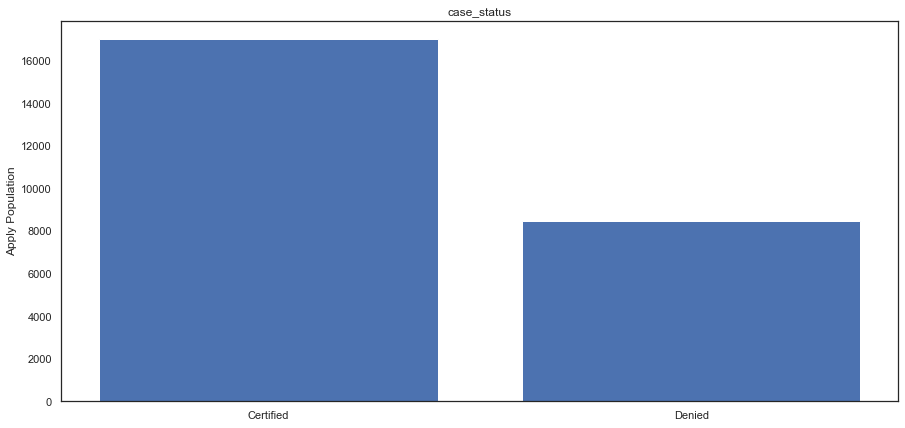

In [270]:
MBarplot(df,'case_status','yr_of_company')

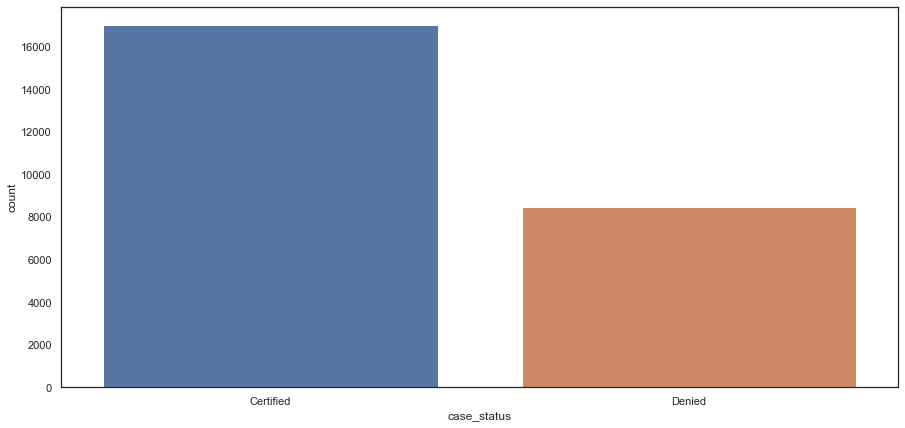

In [271]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['case_status'],order=df['case_status'].value_counts().index);

In [272]:
df['case_status'].value_counts(normalize=True)

Certified    0.667896
Denied       0.332104
Name: case_status, dtype: float64

* Nearly 2/3 of the applicants can get the visa.

### Histogram and Box plot for the continuous columns

**column:yr_of_company**

**matplotlib**

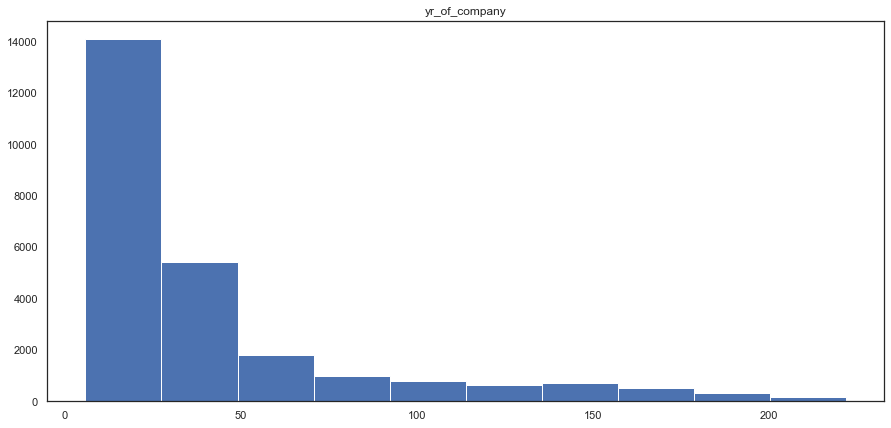

In [273]:
plt.figure(figsize=(15,7))
plt.hist(df.yr_of_company)
plt.title('yr_of_company');

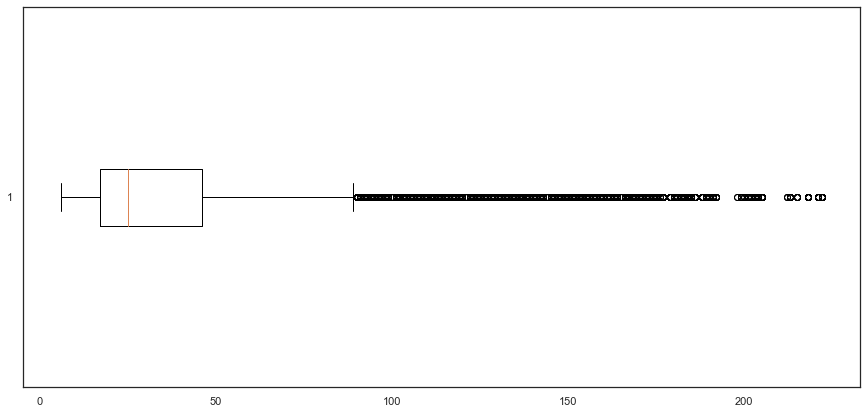

In [274]:
plt.figure(figsize=(15,7))
plt.boxplot(df['yr_of_company'], vert=0);

**seaborn**

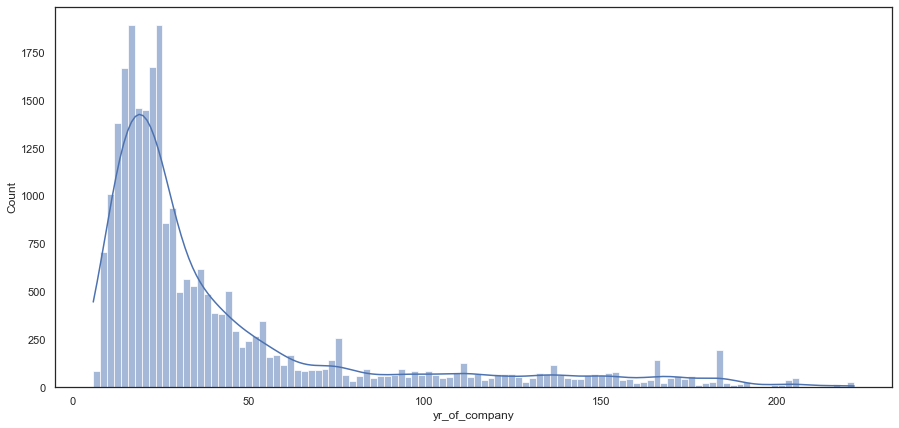

In [275]:
plt.figure(figsize=(15,7))
sns.histplot(x = df['yr_of_company'],kde=True);

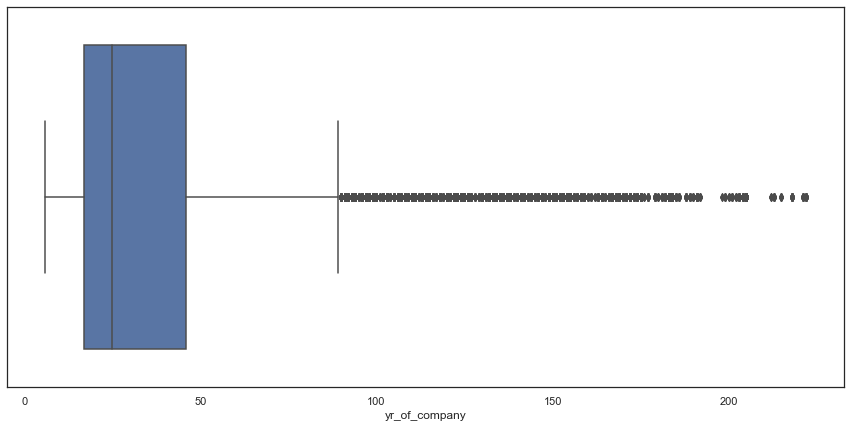

In [276]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df['yr_of_company']);

* A extreme right skew histogram, most companies "younger" than 50 years old. Tons of outliers for this column data.
* We believe that seaborn is much friendly to us than the matplotlib library.

**column:no_of_employees**

**matplotlib**

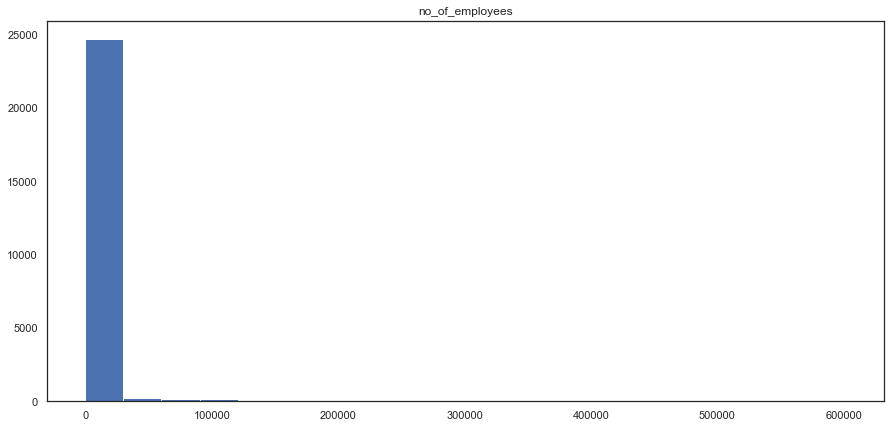

In [277]:
plt.figure(figsize=(15,7))
plt.hist(df.no_of_employees, bins=20)
plt.title('no_of_employees');

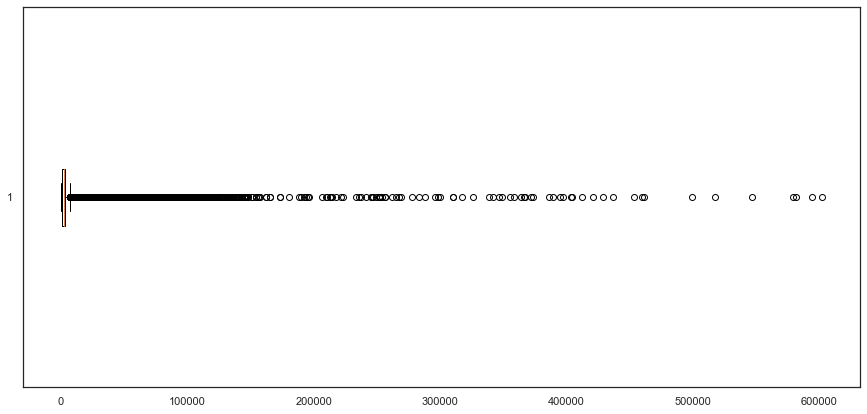

In [278]:
plt.figure(figsize=(15,7))
plt.boxplot(df['no_of_employees'], vert=0);

**From the histplot of 'no_of_employees' we can see that most of the companies have few employees, and some behemoths have more than 500 thousands of employees.**

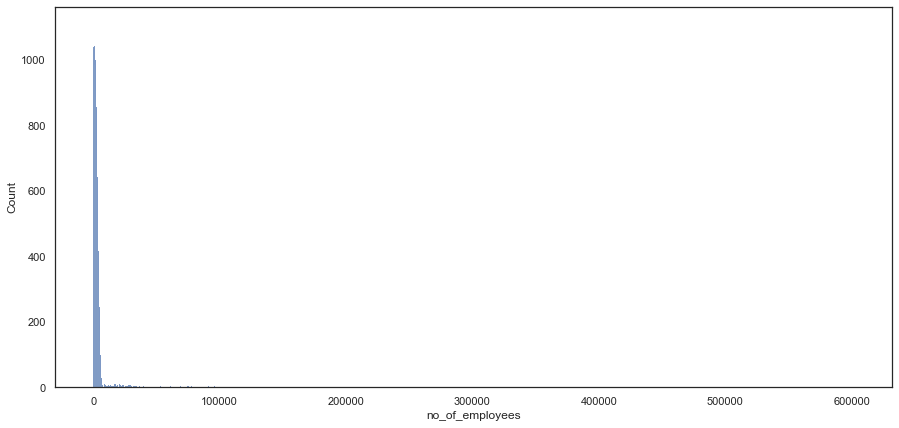

In [279]:
plt.figure(figsize=(15,7))
sns.histplot(x = df['no_of_employees']);

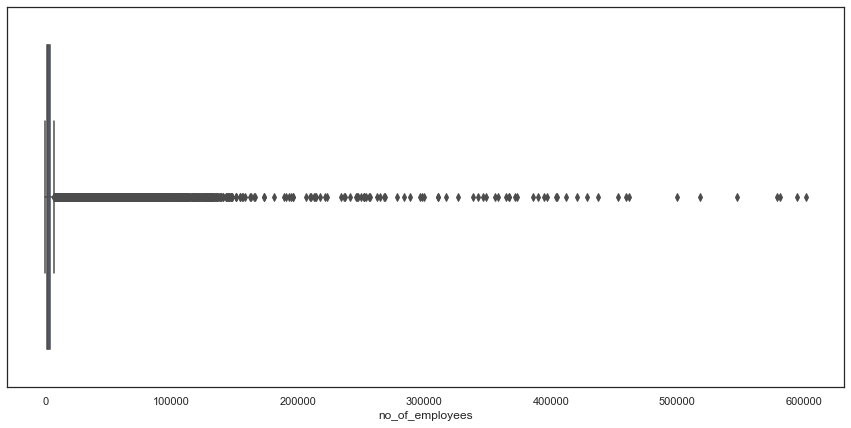

In [280]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df['no_of_employees']);

* Again, a extreme right skew, lots of outliers, and most companies have less than 100 employees.

**column:prevailing_wage**

**matplotlib**

Text(0.5, 1.0, 'prevailing_wage')

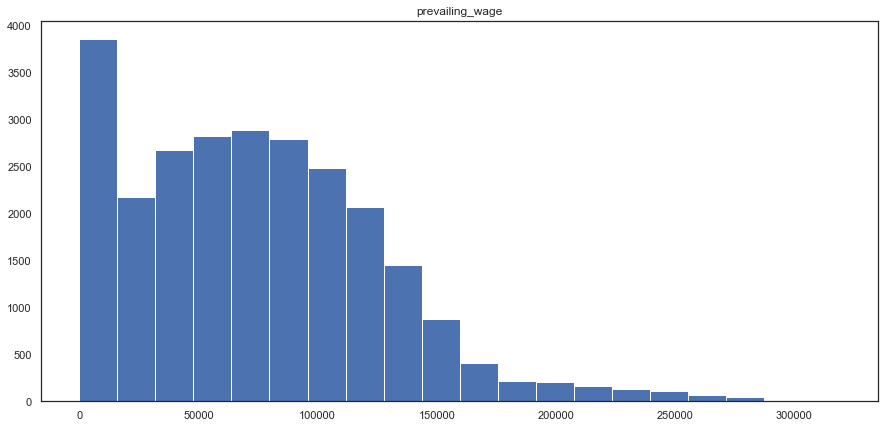

In [281]:
plt.figure(figsize=(15,7))
plt.hist(df.prevailing_wage, bins=20)
plt.title('prevailing_wage')

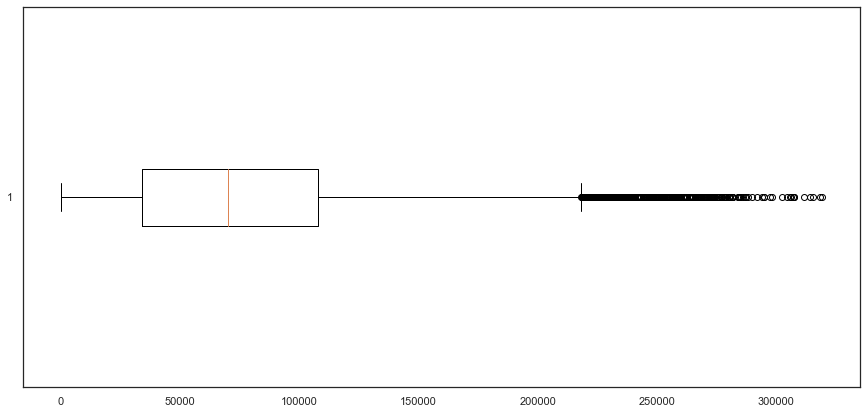

In [282]:
plt.figure(figsize=(15,7))
plt.boxplot(df['prevailing_wage'], vert=0);

**seaborn**

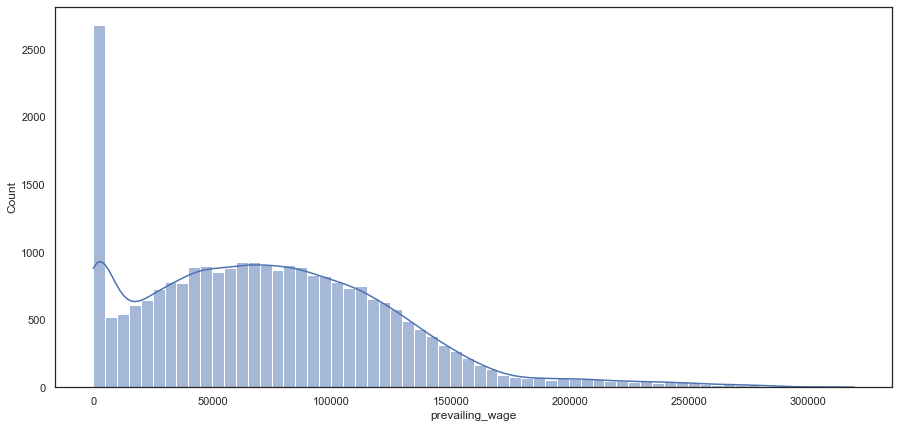

In [283]:
plt.figure(figsize=(15,7))
sns.histplot(x = df['prevailing_wage'],kde=True);

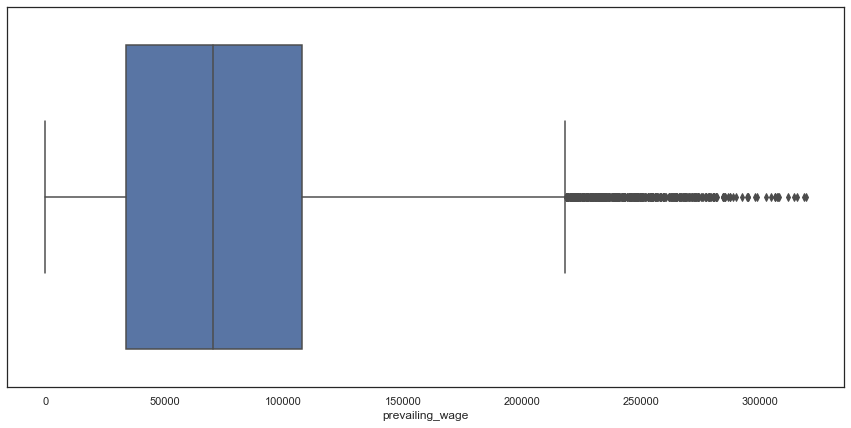

In [284]:
plt.figure(figsize=(15,7))
data = df['prevailing_wage']
sns.boxplot(data, orient = 'H');

* From the histplot of 'prevailing wage' we can see that most of the wage range around 80000, and there are also some wage that is very low, that's due to they are paid by hours.

### Section4.B. Inference

#### Select the numeric columns to generate heatmap, to look at the correlation among them.

* Seaborn

In [285]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

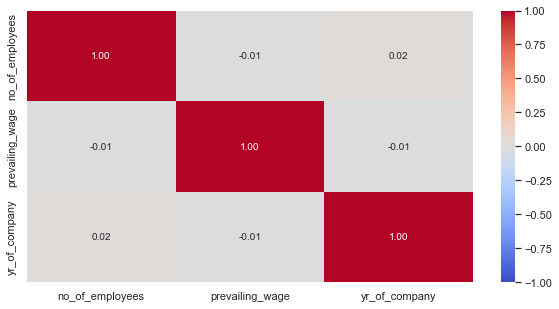

In [286]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
);

* matplotlib

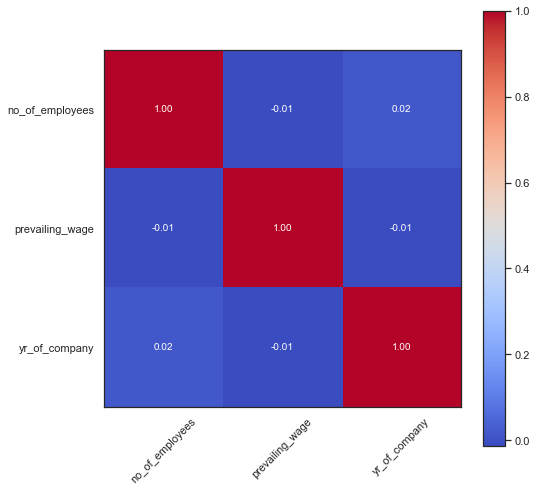

In [287]:
df1=df[['no_of_employees','prevailing_wage','yr_of_company']]
plt.imshow(df1.corr(), cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(df1.columns)),df1.columns, rotation=45)
plt.yticks(range(len(df1.columns)),df1.columns)
plt.gcf().set_size_inches(8,8)

labels=df1.corr().values
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        plt.text(i,j,'{:.2f}'.format(labels[j,i]),ha='center',va='center',color='white')

#### PairPlot

* seaborn

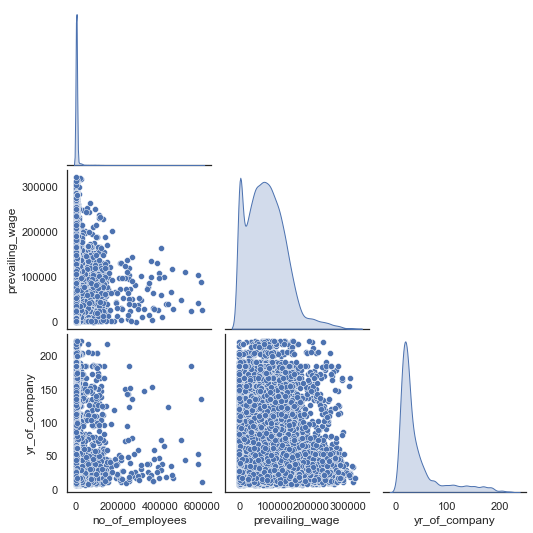

In [288]:
sns.pairplot(data=df1,diag_kind="kde",corner=True);

* matplotlib

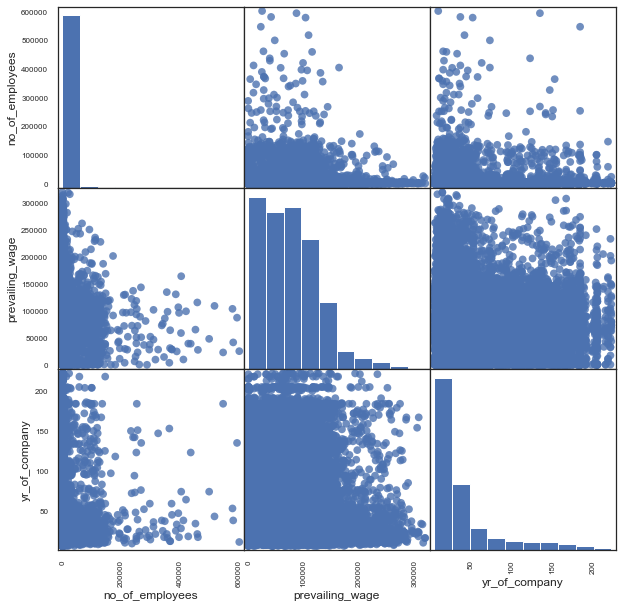

In [289]:
g = pd.plotting.scatter_matrix(df1, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)

plt.show()

* We can noticed that among these numeric columns, there is no significant relationship.

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

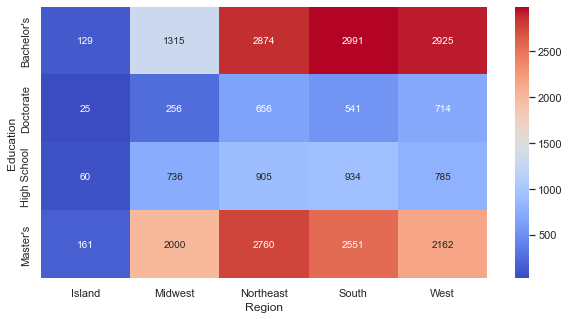

In [290]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(df["education_of_employee"], df["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="coolwarm",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

* We can notice that there are significantly more applicants from Northeast, South, and West, regardless of academic qualifications. At the same time, we can notice that Master and Bachelor have become the main components of applicants.

#### Stack bar chart for categorical variables, to show the rate of visas obtained by applicants from different groups in the certain column.

**column:continent**

**matplotlib**

In [291]:
def Mstack_bar(data,b,a):
    sorter = data[a].value_counts().index[-1]
    tabl = pd.crosstab(data[b],data[a], normalize='index').sort_values(
       by=sorter,ascending=False)
    tabl.plot(rot=0,kind="bar", stacked=True,color=['steelblue', 'red'],figsize = (15,7))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.figure(figsize=(10, 5))
    plt.show()

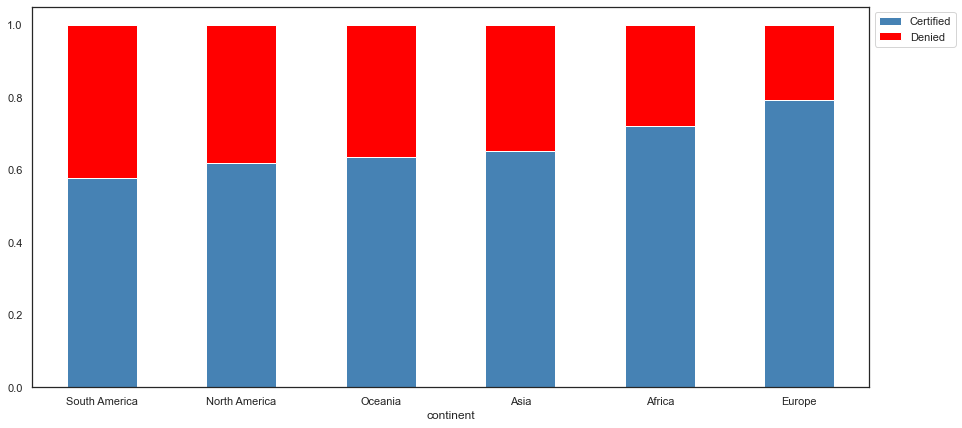

<Figure size 720x360 with 0 Axes>

In [292]:
Mstack_bar(df,'continent','case_status')

**seaborn**

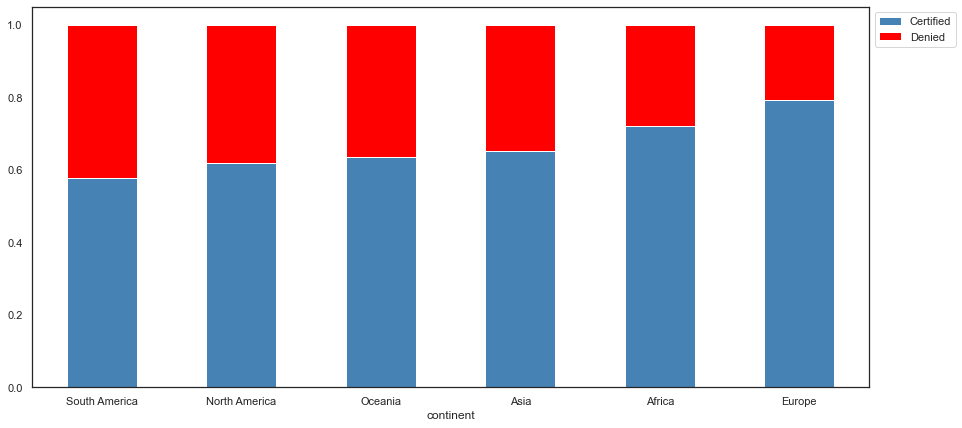

In [293]:
A = df[['continent','case_status','yr_of_company']]
sorter = A['case_status'].value_counts().index[-1]

A1 = pd.crosstab(A['continent'],A['case_status'], normalize = 'index').sort_values(
       by=sorter,ascending=False)
sns.set(style='white')

#create stacked bar chart
A1.plot(kind = 'bar', stacked = True,rot = 0, color =['steelblue','red'],figsize = (15,7))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

* European applicant got the highest certified ratio among all continents, Africa comes follow and South America got the highest denied percentage.

**education_of_employee**

**matplotlib**

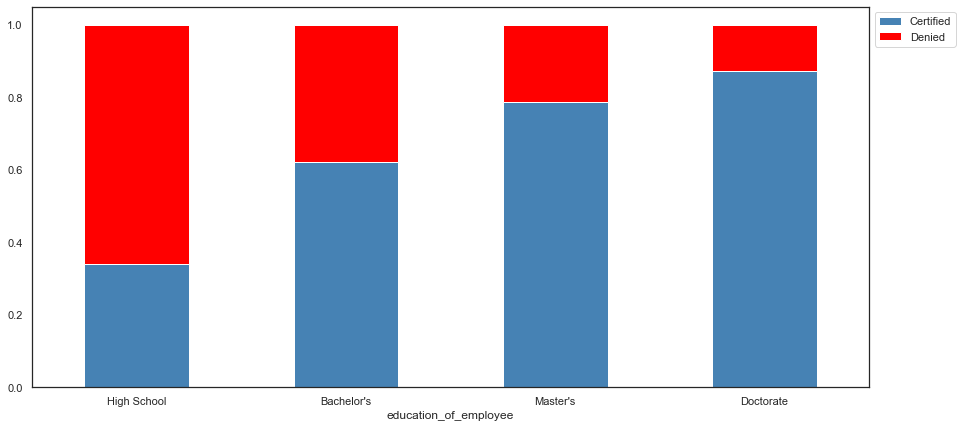

<Figure size 720x360 with 0 Axes>

In [294]:
Mstack_bar(df,'education_of_employee','case_status')

**seaborn**

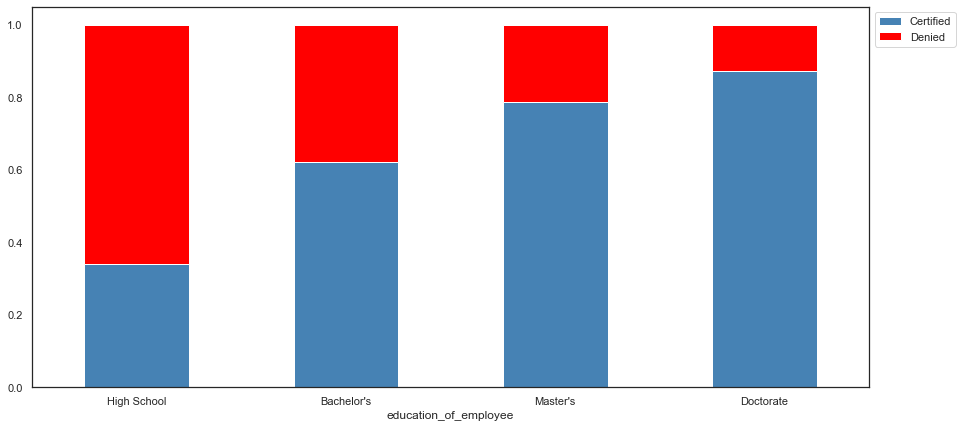

In [295]:
B = df[['education_of_employee','case_status','yr_of_company']]
sorter = B['case_status'].value_counts().index[-1]
B1 = pd.crosstab(B['education_of_employee'],B['case_status'], normalize = 'index').sort_values(
       by=sorter,ascending=False)
sns.set(style='white')

#create stacked bar chart
B1.plot(kind = 'bar', stacked = True,rot = 0, color =['steelblue','red'],figsize = (15,7))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

* As the degree improves, so does the applicant's pass rate. The Ph.D. has the highest pass rate.

**column:has_job_experience**

**matplotlib**

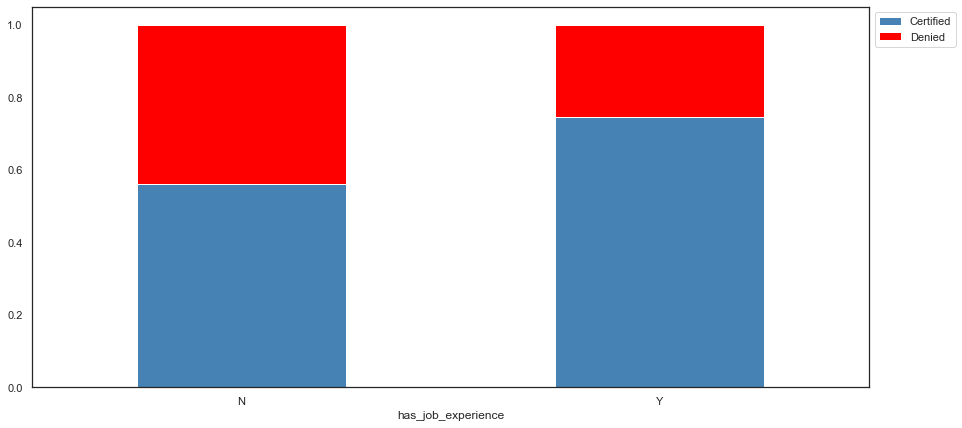

<Figure size 720x360 with 0 Axes>

In [296]:
Mstack_bar(df,'has_job_experience','case_status')

**seaborn**

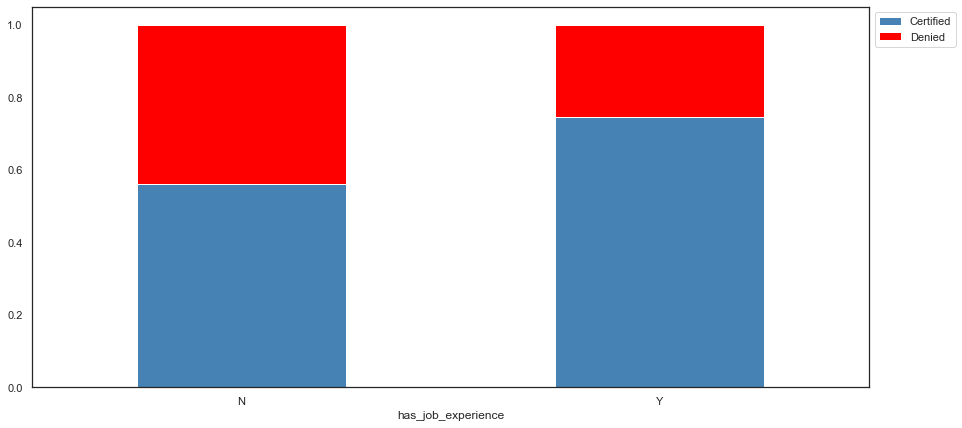

In [297]:
C = df[['has_job_experience','case_status','yr_of_company']]
sorter = C['case_status'].value_counts().index[-1]
C = df[['has_job_experience','case_status','yr_of_company']]
C1 = pd.crosstab(C['has_job_experience'],C['case_status'], normalize = 'index').sort_values(
       by=sorter,ascending=False)
sns.set(style='white')

#create stacked bar chart
C1.plot(kind = 'bar', stacked = True,rot = 0, color =['steelblue','red'],figsize = (15,7))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

* Clearly, the group with work experience has a higher pass rate

**column:requires_job_training**

**matplotlib**

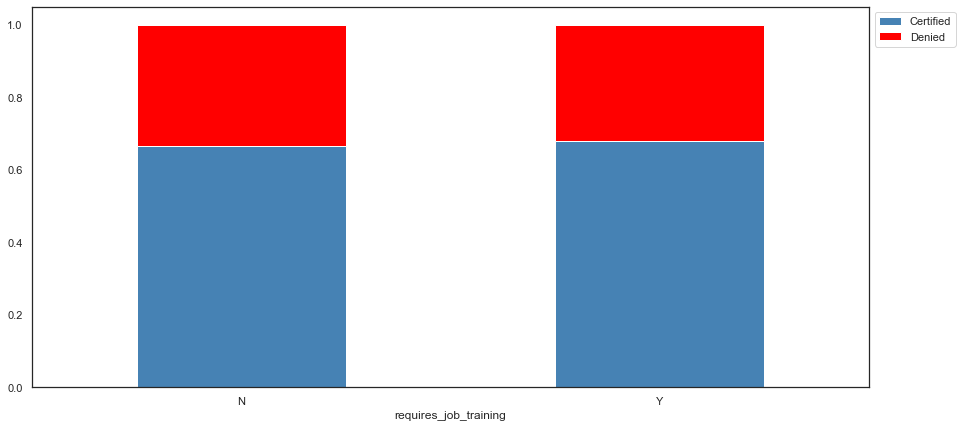

<Figure size 720x360 with 0 Axes>

In [298]:
Mstack_bar(df,'requires_job_training','case_status')

**seaborn**

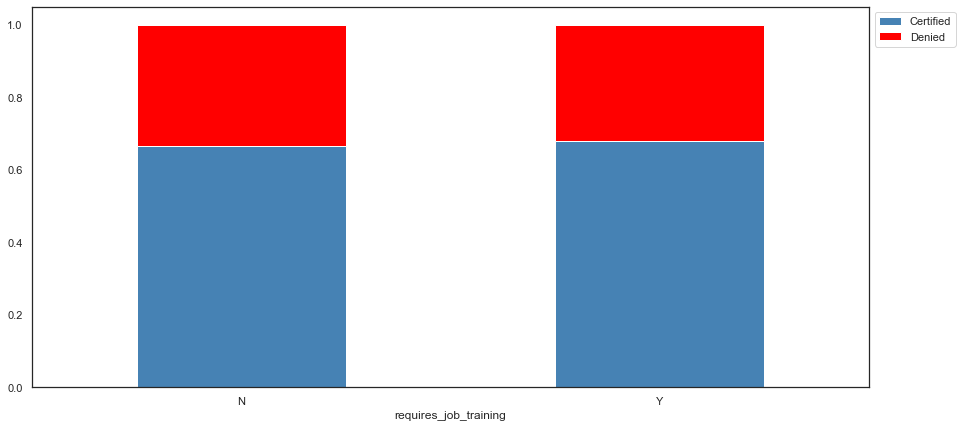

In [299]:
D = df[['requires_job_training','case_status','yr_of_company']]
sorter = D['case_status'].value_counts().index[-1]
D = df[['requires_job_training','case_status','yr_of_company']]
D1 = pd.crosstab(D['requires_job_training'],D['case_status'], normalize = 'index').sort_values(
       by=sorter,ascending=False)
sns.set(style='white')

#create stacked bar chart
D1.plot(kind = 'bar', stacked = True,rot = 0, color =['steelblue','red'],figsize = (15,7))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

* There is no significant difference in the pass rate depending on whether the new position requires training or not

**column:region_of_employment**

**matplotlib**

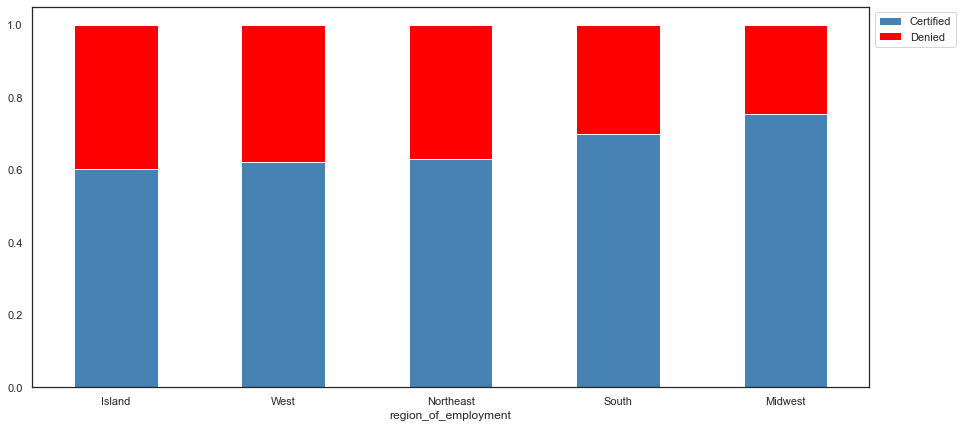

<Figure size 720x360 with 0 Axes>

In [300]:
Mstack_bar(df,'region_of_employment','case_status')

**seaborn**

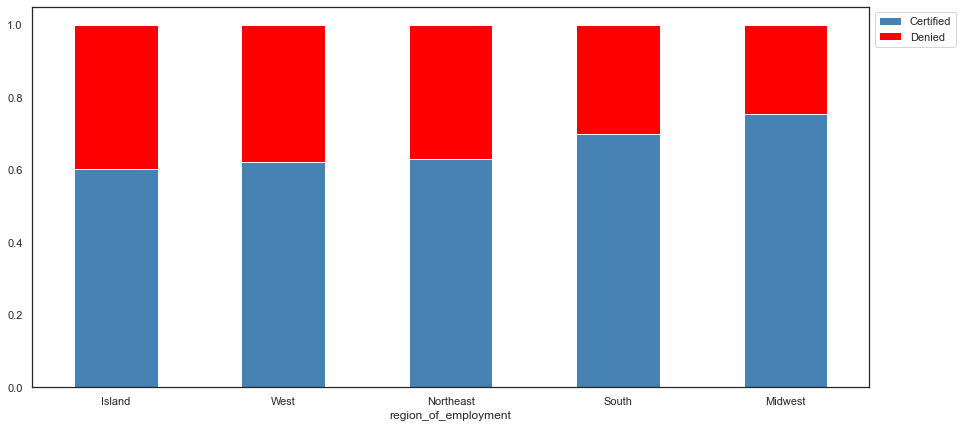

In [301]:
E = df[['region_of_employment','case_status','yr_of_company']]
sorter = E['case_status'].value_counts().index[-1]
E = df[['region_of_employment','case_status','yr_of_company']]
E1 = pd.crosstab(E['region_of_employment'],E['case_status'], normalize = 'index').sort_values(
       by=sorter,ascending=False)
sns.set(style='white')

#create stacked bar chart
E1.plot(kind = 'bar', stacked = True,rot = 0, color =['steelblue','red'],figsize = (15,7))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

* Applicants applying to Midwest corporations had the highest pass rates, followed by the South, and the region with the lowest pass rates was Island.

**column:unit_of_wage**

**matplotlib**

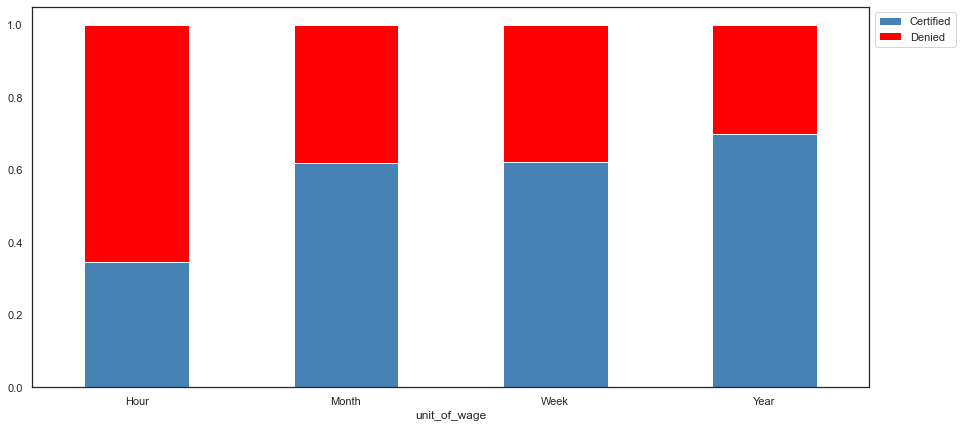

<Figure size 720x360 with 0 Axes>

In [302]:
Mstack_bar(df,'unit_of_wage','case_status')

**seaborn**

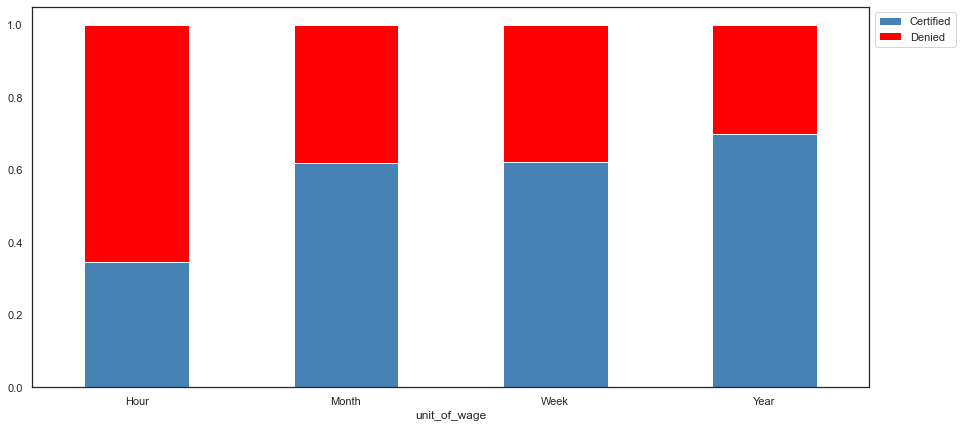

In [303]:
F = df[['unit_of_wage','case_status','yr_of_company']]
sorter = F['case_status'].value_counts().index[-1]
F = df[['unit_of_wage','case_status','yr_of_company']]
F1 = pd.crosstab(F['unit_of_wage'],F['case_status'], normalize = 'index').sort_values(
       by=sorter,ascending=False)
sns.set(style='white')

#create stacked bar chart
F1.plot(kind = 'bar', stacked = True,rot = 0, color =['steelblue','red'],figsize = (15,7))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

* Applicants based on annual salary have a significantly higher pass rate.

**column:full_time_position**

**matplotlib**

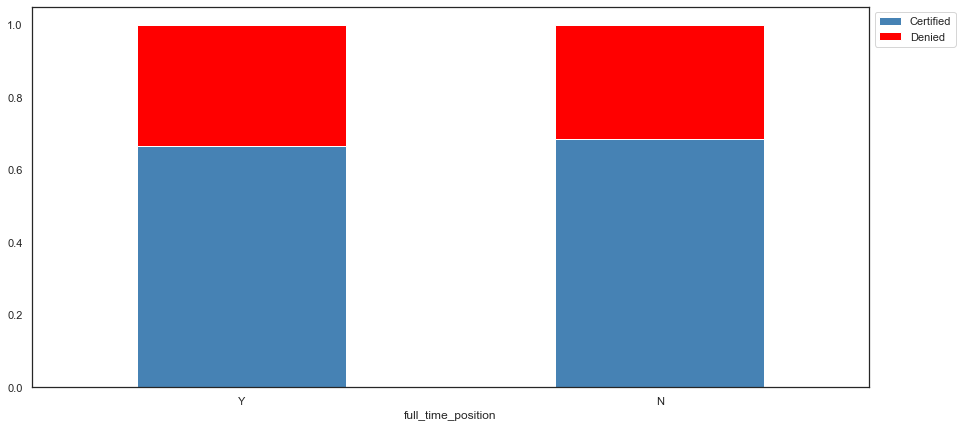

<Figure size 720x360 with 0 Axes>

In [304]:
Mstack_bar(df,'full_time_position','case_status')

**seaborn**

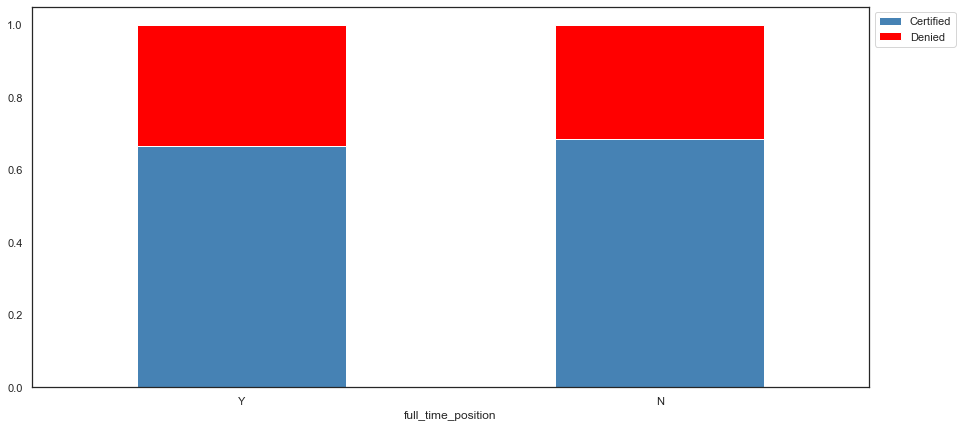

In [305]:
G = df[['full_time_position','case_status','yr_of_company']]
sorter = G['case_status'].value_counts().index[-1]
G = df[['full_time_position','case_status','yr_of_company']]
G1 = pd.crosstab(G['full_time_position'],G['case_status'], normalize = 'index').sort_values(
       by=sorter,ascending=False)
sns.set(style='white')

#create stacked bar chart
G1.plot(kind = 'bar', stacked = True,rot = 0, color =['steelblue','red'],figsize = (15,7))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

* Whether the job was full-time or not did not differ significantly between the two groups.

#### Histogram with "hue" for continuous variables, to show the different data distribution of the data in two different groups(certified & denied)

**column:prevailing_wage**

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

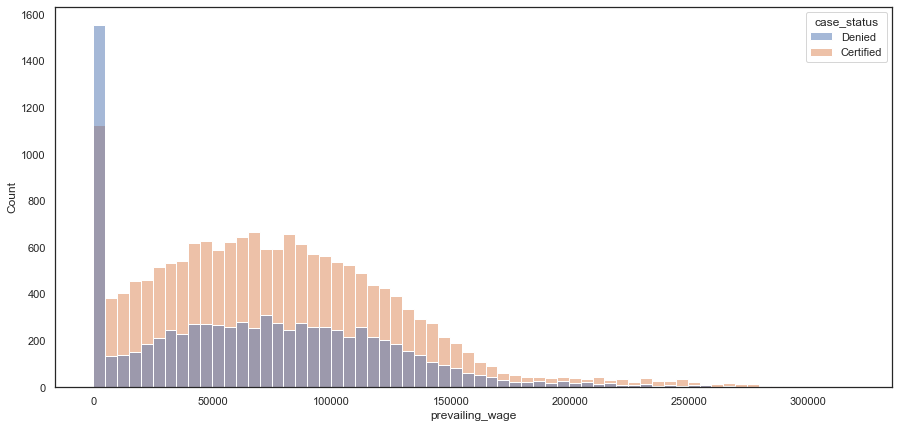

In [306]:
plt.figure(figsize=(15,7))
sns.histplot(df,x="prevailing_wage",hue="case_status")

* Approved applicants outnumber rejected applicants regardless of salary range

**column:no_of_employees**

<AxesSubplot:xlabel='no_of_employees', ylabel='Count'>

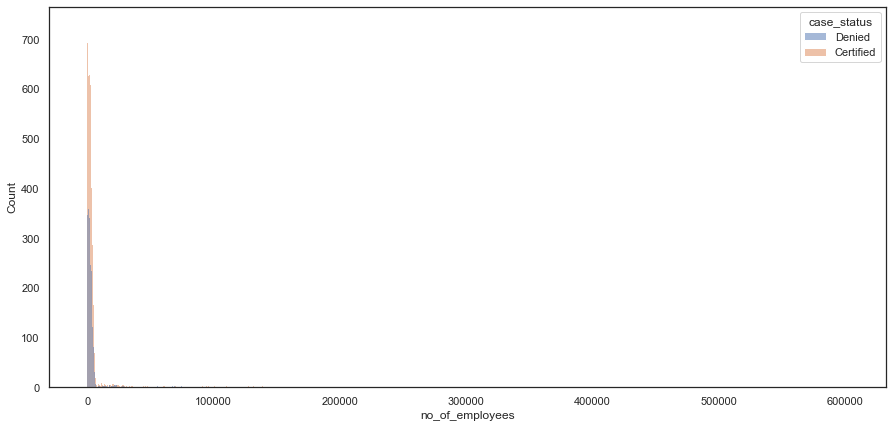

In [307]:
plt.figure(figsize=(15,7))
sns.histplot(df,x="no_of_employees",hue="case_status")

* Approved applicants generally apply to companies with more employees than rejected applicants.

## Section5: Conclusion

**Demographic**
* The largest number of applicants came from Asia, which is understandable because Asia has the largest population of any continent.
* Among the applicants, the number of applicants with a bachelor's degree is the largest, followed by research laboratories, and the number of applicants with a doctoral degree is the least.
* It is also reasonable that most applicants have work experience and no training is required in the new role, and those with work experience are more welcome.
* Likewise, the number of applicants applying to Northeast, South, and West companies is in the top three, which also makes sense because the Northeast is the most densely populated, and the South and West are equally populated with more companies.
* Most people's salary unit is "annual salary" and full time position, that's make sense.
* More than two-thirds of all applicants were approved for work visas in the United States.

**Who is more likely to get a visa?**
* In our research, we can find that applicants from Europe have the highest percentage of visas.
* Applicants with a Ph.D. have the highest percentage of visas. This was followed by masters and then bachelors, with applicants with only a high school degree getting the lowest percentage of visas. This makes sense, because the United States prefers applicants with higher education and higher quality.
* Applicants who also have work experience are more likely to obtain a visa. This is also justified, because such applicants are more able to work directly with the company, saving the company's costs.
* Applicants applying to Midwestern and Southern companies are more likely to obtain visas for reasons that need further analysis.
* Applicants with annual salary as the settlement unit have a higher proportion of obtaining visas, because the company prefers a stable employee who can work in the company for a long time.
* There is no significant difference in the full-time position of visa approval, which makes us wonder why this is for further study.
* So if you are an applicant from Europe with a Ph.D., work experience, and salary based on annual salary, then your visa to work in the United States is more likely to be approved.

**Future research**
* This study is only a "descriptive" study. In future studies, we can use machine learning techniques such as decision trees and ensemble techniques to further predict which applicants will be able to obtain visas.

---